## Libraries

In [4]:
#!pip install pandas-datareader
#!pip install yfinance --upgrade --no-cache-dir

import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn import linear_model
from sklearn.metrics import r2_score
from datetime import date

yf.pdr_override() 
%matplotlib inline

## Importing and processing the data

In [5]:
#Define a date of the month
day0=date.today().day #Today's date
#day0= 9 #Define the date that suit your needs

ibov = web.get_data_yahoo ('^BVSP')
print(ibov.tail())
ibov.iloc[:,0:5] = np.sqrt (ibov.iloc[:,0:5])
ibov_month=ibov[["Close"]][ibov.index.day==day0] 
ibov_month.reset_index(inplace=True)

#creating the response and exploratory variables
x=ibov_month['Date']-ibov_month['Date'][0]
days = x.astype('timedelta64[M]').astype(float)
days=np.asanyarray(days)
days=days.reshape(-1, 1)

Cotacao=ibov_month['Close'].values
Cotacao=np.asanyarray(Cotacao)


[*********************100%***********************]  1 of 1 completed
               Open     High      Low    Close  Adj Close    Volume
Date                                                               
2020-06-15  92780.0  93112.0  90148.0  92376.0    92376.0  13317500
2020-06-16  92387.0  95216.0  92387.0  93531.0    93531.0  12034200
2020-06-17  93531.0  96611.0  93531.0  95547.0    95547.0  11134700
2020-06-18  95547.0  97110.0  94698.0  96125.0    96125.0  10008500
2020-06-19  96138.0  97540.0  95874.0  96572.0    96572.0  13134400


## Modelling the data

The R2 of the model is 0.89


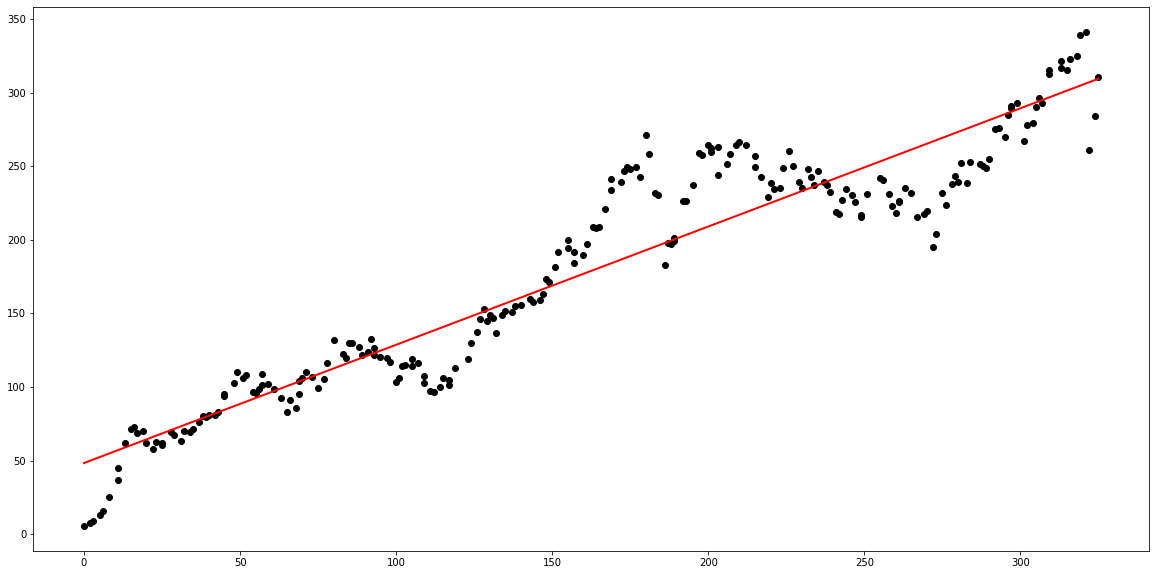

In [6]:
LR=linear_model.LinearRegression()
LR.fit (days,Cotacao)
yhat=LR.predict (days)
print ("The R2 of the model is %.2f" % r2_score (Cotacao,yhat))
plt.figure(figsize=(20,10))
plt.scatter(days,Cotacao,  color='black')
plt.plot(days,yhat, color='red', linewidth=2)
plt.show()


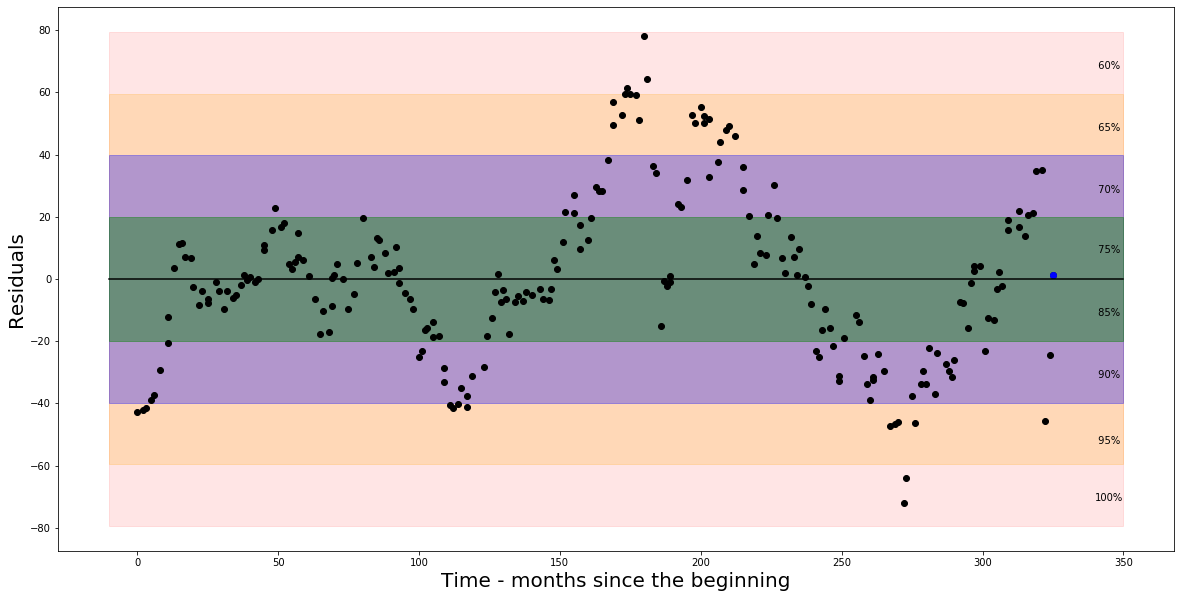

In [7]:
residuos=Cotacao-yhat
std=[residuos.mean()+residuos.std(),residuos.mean()-residuos.std()] 
x_coordinates = [-10, 350]
y_coordinates = [0, 0]
x_position_label = 340

plt.figure(figsize=(20,10))
plt.ylabel ('Residuals',size=20)
plt.xlabel ('Time - months since the beginning',size=20)
plt.fill_between(x_coordinates, std[0]*3, std[1]*3,alpha=0.1,color='red')
plt.fill_between(x_coordinates, std[0]*2.25, std[1]*2.25,alpha=0.2,color='orange')
plt.fill_between(x_coordinates, std[0]*1.5, std[1]*1.5,alpha=0.3,color='blue')
plt.fill_between(x_coordinates, std[0]*0.75, std[1]*0.75,alpha=0.4,color='green')

plt.scatter(days,residuos,  color='black')
plt.scatter(days[len(days)-1],residuos[len(residuos)-1],  color='blue')
plt.plot(x_coordinates, y_coordinates, color='black')
plt.annotate (' 60%',xy=(x_position_label,std[0]*2.55),size=10)
plt.annotate ('100%',xy=(x_position_label,std[1]*2.7),size=10)
plt.annotate (' 65%',xy=(x_position_label,std[0]*1.8),size=10)
plt.annotate (' 95%',xy=(x_position_label,std[1]*2.0),size=10)
plt.annotate (' 70%',xy=(x_position_label,std[0]*1.05),size=10)
plt.annotate (' 90%',xy=(x_position_label,std[1]*1.20),size=10)
plt.annotate (' 75%',xy=(x_position_label,std[0]*0.32),size=10)
plt.annotate (' 85%',xy=(x_position_label,std[1]*0.45),size=10)
plt.show()